### corpus weight
corpus_weight 等于 每个topic中word的数量在整个语料库中word的种类数

In [26]:
from corpus import *
from vsm import *
# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[4]
# load the topic model
v = lda_v[k]


Loading LDA data from /home/yz/anaconda2/test/kmx_v2/models/kmx-freq5-freq5-N999999-LDA-K100-document-2000.npz


### 定义 corpus_weight 函数
topic 为某个主题（从0开始）

In [27]:
def corpus_weight(topic, threshold = 5.62603546e-06):
    topic_list = v.topics()[topic]
    count = 0.0
    for topic in topic_list:
        if topic[1] > threshold:
            count += 1
    return count/len(c.words)

### 以表的形式显示 corpus weight 前十的 topic

In [29]:
topic_dict = {}
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_dict[i] = corpus_weight(i)
# 按照topic_weight从小到大的顺序排列
topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)

topic = []  # 记录前10的topic
weight = []  #前十topic对应的权重
words = []  #前十topic的keywords
count = 0

for topic_weight in topic_dict_order:
    topic.append(topic_weight[0])
    weight.append(topic_weight[1])
    word_weight_list = v.topics()[topic_weight[0]]
    word = []
    for word_weight in word_weight_list:
        word.append(word_weight[0])
    words.append(word)
    count += 1
    if count == 10:
        break
# 画表
from pandas import Series,DataFrame
import pandas as pd
data = {"topic":topic,"corpus_weight":weight,"keywords":words}
DataFrame(data,columns=['topic','corpus_weight','keywords'])

,topic,corpus_weight,keywords
0,94,0.199410,"[生, 人, 足, 马, 食, 一, 鱼, 鸟, 木, 山, 水, 死, 牛, 虎, 居, ..."
1,55,0.157843,"[君子, 尔, 心, 维, 人, 载, 思, 止, 匪, 来, 南, 莫, 忧, 归, 采,..."
2,45,0.157141,"[上, 游, 流, 玄, 风, 飞, 发, 山, 西, 衡, 灵, 明, 龙, 观, 扬, ..."
3,69,0.152366,"[臣, 国, 心, 复, 功, 将, 内, 义, 明, 前, 德, 可, 天, 遂, 上, ..."
4,5,0.150400,"[人, 能, 可, 一, 行, 事, 名, 小, 利, 世, 贤, 治, 身, 使, 失, ..."
5,54,0.140851,"[君, 将, 使, 人, 可, 氏, 叔, 楚, 命, 请, 及, 能, 国, 归, 死, ..."
6,6,0.136779,"[君, 人, 臣, 王, 国, 闻, 死, 将, 亡, 主, 使, 对, 请, 士, 寡, ..."
7,42,0.136357,"[宜, 贤, 位, 可, 政, 致, 罪, 奸, 世, 正, 法, 志, 刑, 恶, 邪, ..."
8,93,0.136076,"[人, 太, 书, 郡, 帝, 年, 时, 征, 守, 举, 卒, 司, 字, 迁, 事, ..."
9,65,0.135655,"[文, 本, 义, 按, 字, 说, 书, 人, 引, 传, 一, 音, 德, 语, 释, ..."


### 以图的形式表示每个topic的corpus weight

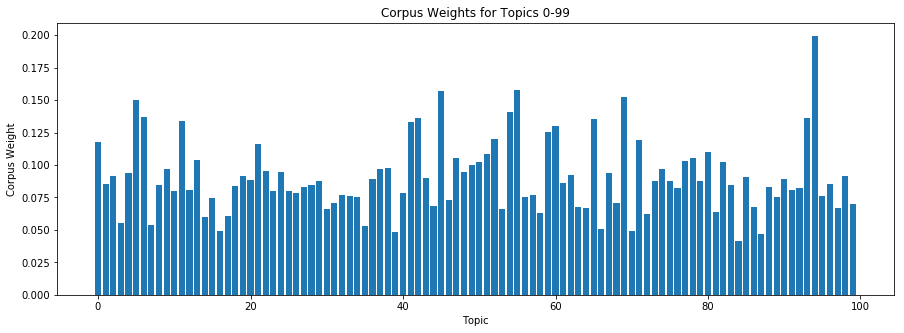

In [34]:
import matplotlib.pyplot as plt
topic_weight_list = []
X = []
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_weight_list.append(corpus_weight(i))
    X.append(i)
plt.figure(figsize=(15,5))
plt.bar(X, topic_weight_list)
    
plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure corpus Weight')
plt.show()